In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [107]:
from syntactic_complexity import analyze_text

In [108]:
initial = analyze_text("Logo após sair da aula, Bianca teve um encontro com Arthur.")
initial

{'MLC': 15.0,
 'MLS': 15.0,
 'DCC': 1.0,
 'CPC': 0.0,
 'profundidade_media': 3.0,
 'profundidade_max': 3,
 'ttr': 1.1538461538461537,
 'text': 'Logo após sair da aula, Bianca teve um encontro com Arthur.'}

In [109]:
data = []
directory = "Redações/humanos/Desafios para o enfrentamento da invisibilidade do trabalho de cuidado realizado pela mulher no Brasil/"
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)

    with open(file_path, "r") as file:
        row = analyze_text(file.read())
        data.append(row)

In [110]:
df = pd.DataFrame(data)
df["type"] = "human"
df.head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,text,type
0,12.461538,30.375000,0.615385,0.205128,5.375000,8,0.612903,Conforme estudos demográficos realizados pelo ...,human
1,23.950000,31.933333,0.750000,1.900000,5.733333,8,0.501149,O trabalho de cuidado se mostra necessário na ...,human
2,16.097561,41.250000,0.585366,0.780488,7.250000,10,0.548552,A filósofa contemporânea Hannah Arendt constat...,human
3,14.250000,32.571429,0.562500,1.062500,6.142857,15,0.577500,"Na obra “Utopia”, de Thomas More, é retratada ...",human
4,18.024390,41.055556,0.682927,0.902439,6.277778,11,0.511628,"A Constituição Cidadã traz, entre suas diretri...",human


In [111]:
data = []
directory = "Redações/system prompt matias/Enem 2022 Sem Texto Motivador/gpt-3.5-turbo/"
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)

    with open(file_path, "r") as file:
        row = analyze_text(file.read())
        data.append(row)

In [112]:
machine = pd.DataFrame(data)
machine["type"] = "LLM"
machine.head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,text,type
0,14.527778,47.545455,0.750000,1.333333,7.454545,13,0.454545,"No Brasil, a invisibilidade do trabalho de cui...",LLM
1,15.157895,48.000000,0.657895,1.473684,8.250000,12,0.452514,A invisibilidade do trabalho de cuidado realiz...,LLM
2,16.468750,40.538462,0.718750,1.593750,6.692308,10,0.466387,A invisibilidade do trabalho de cuidado realiz...,LLM
3,16.916667,40.600000,0.750000,1.250000,7.733333,10,0.370175,"Com base em sua solicitação, segue a redação m...",LLM
4,12.439024,42.500000,0.609756,0.902439,7.916667,10,0.459916,É inegável que a invisibilidade do trabalho de...,LLM


In [113]:
df = pd.concat([df,machine])

In [114]:
df.sample(5).head()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,text,type
18,19.083333,38.166667,0.583333,1.458333,6.916667,12,0.474178,"No cenário contemporâneo, a invisibilidade do ...",LLM
6,13.605263,36.928571,0.684211,0.526316,6.142857,10,0.507592,"A Constituição Federal de 1988, documento jurí...",human
10,13.317073,36.400000,0.634146,1.073171,6.600000,8,0.462926,Em uma sociedade marcada por desigualdades de ...,LLM
4,18.024390,41.055556,0.682927,0.902439,6.277778,11,0.511628,"A Constituição Cidadã traz, entre suas diretri...",human
9,14.365854,42.071429,0.707317,1.243902,7.857143,13,0.424074,A invisibilidade do trabalho de cuidado realiz...,LLM


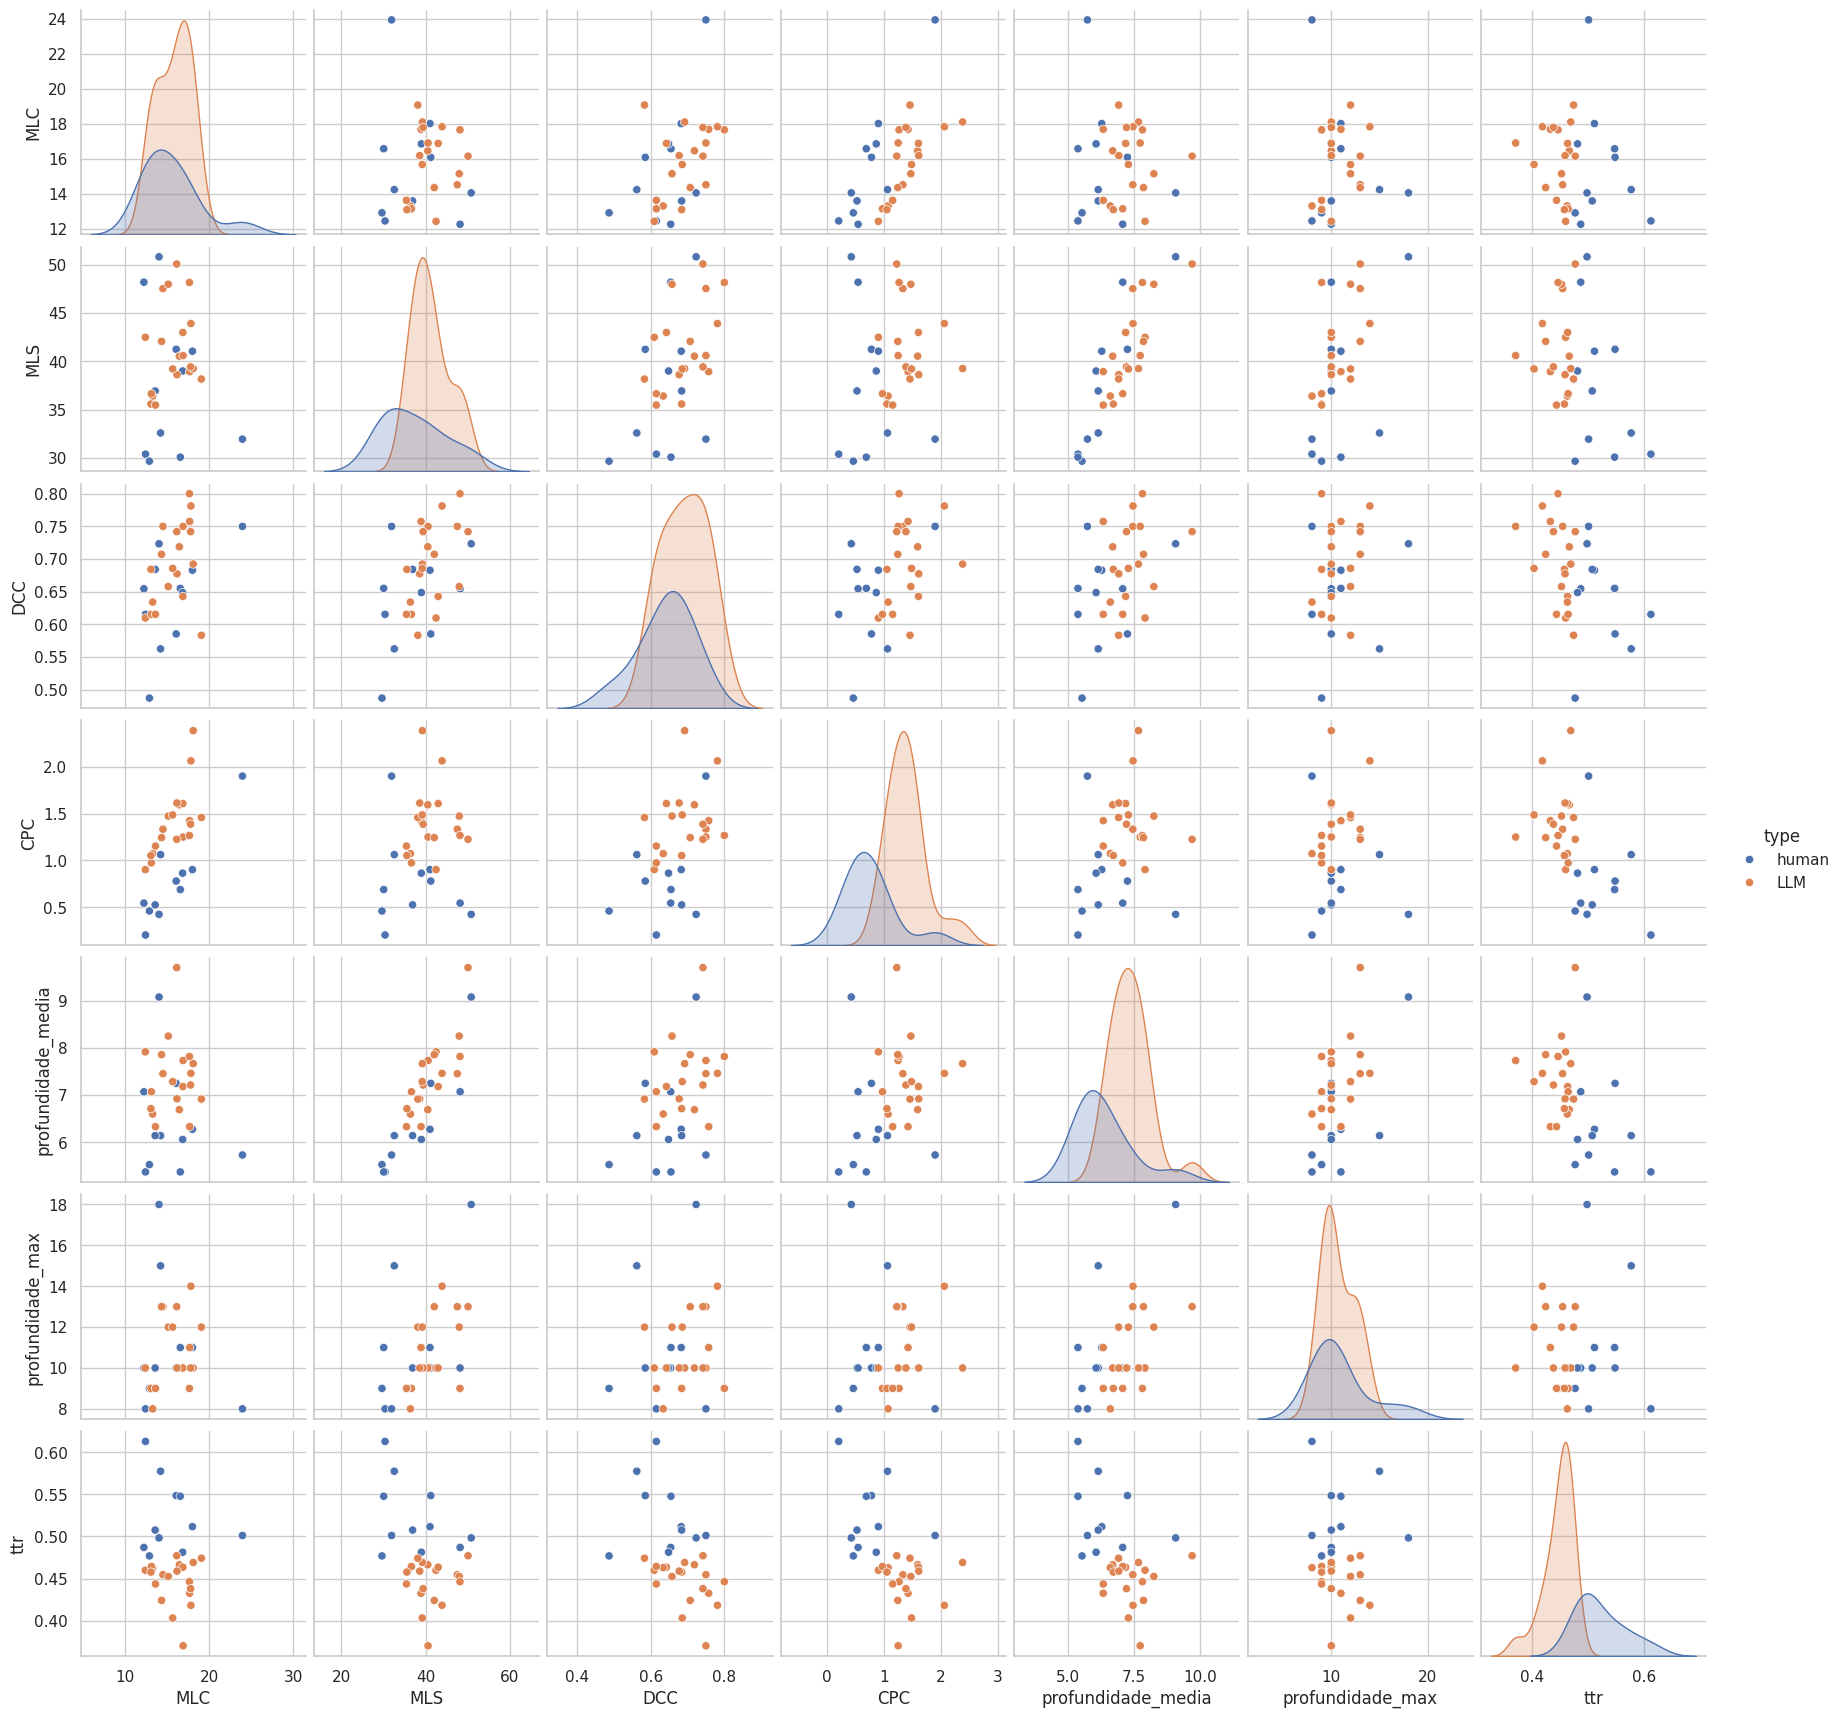

In [115]:
sns.pairplot(df,hue="type")

In [116]:
from scipy.stats import ttest_ind
from scipy.stats import anderson


grouped_data = df.groupby('type')

group1 = grouped_data.get_group("human")
group2 = grouped_data.get_group("LLM")

ttest_results = {
    'Feature': [],
    'T-Statistic': [],
    'P-Value': [],
    'Significant': [],
    'Normality': []
}
for column in df.select_dtypes(include='number').columns:
    # Extract the data for each group for the current column
    data1 = group1[column]
    data2 = group2[column]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(data1, data2)
    
    # Determine if the result is significant (p-value < 0.05)
    significant = p_value < 0.05

    normal = anderson(data1, 'norm').statistic < 0.05
    
    # Store the results in the dictionary
    ttest_results['Feature'].append(column)
    ttest_results['T-Statistic'].append(t_stat)
    ttest_results['P-Value'].append(p_value)
    ttest_results['Significant'].append(significant)
    ttest_results['Normality'].append(normal)

In [117]:
results_df = pd.DataFrame(ttest_results)
results_df.sort_values(by = 'Significant',inplace=True)
results_df

,Feature,T-Statistic,P-Value,Significant,Normality
0,MLC,-0.268147,0.790485,False,False
1,MLS,-1.786036,0.084555,False,False
5,profundidade_max,0.249010,0.805108,False,False
2,DCC,-2.045908,0.049929,True,False
3,CPC,-4.360825,0.000149,True,False
4,profundidade_media,-2.942682,0.006341,True,False
6,ttr,6.064885,0.000001,True,False


In [118]:
significant_ones = results_df[results_df["Significant"]== True]
significant_ones

,Feature,T-Statistic,P-Value,Significant,Normality
2,DCC,-2.045908,0.049929,True,False
3,CPC,-4.360825,0.000149,True,False
4,profundidade_media,-2.942682,0.006341,True,False
6,ttr,6.064885,0.000001,True,False


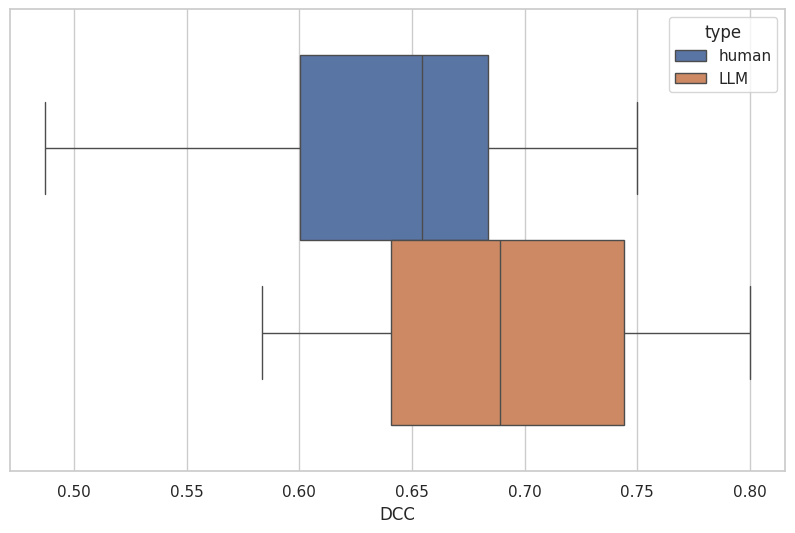

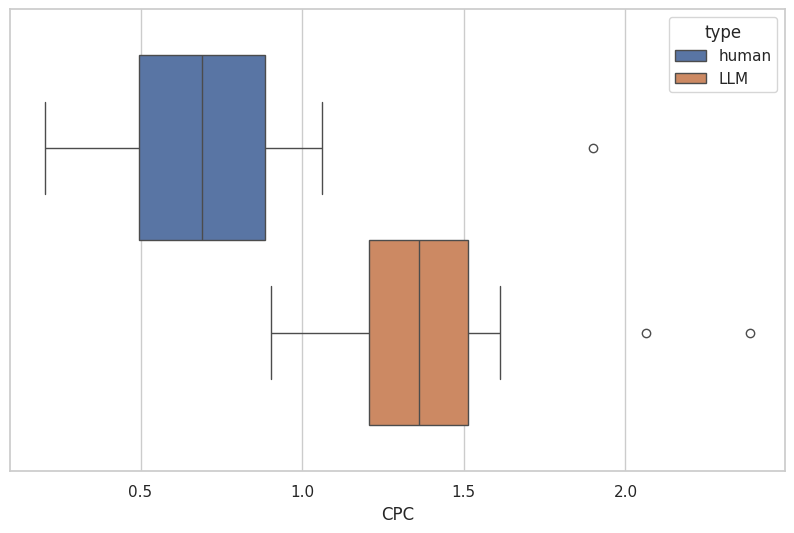

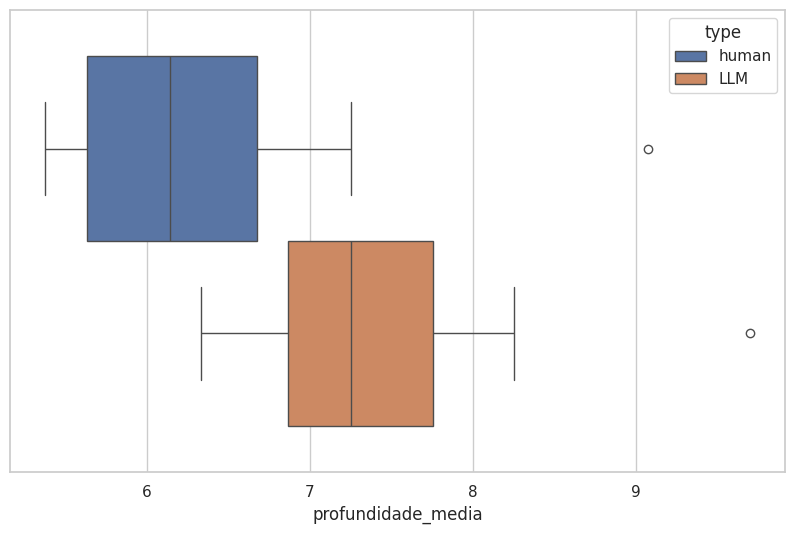

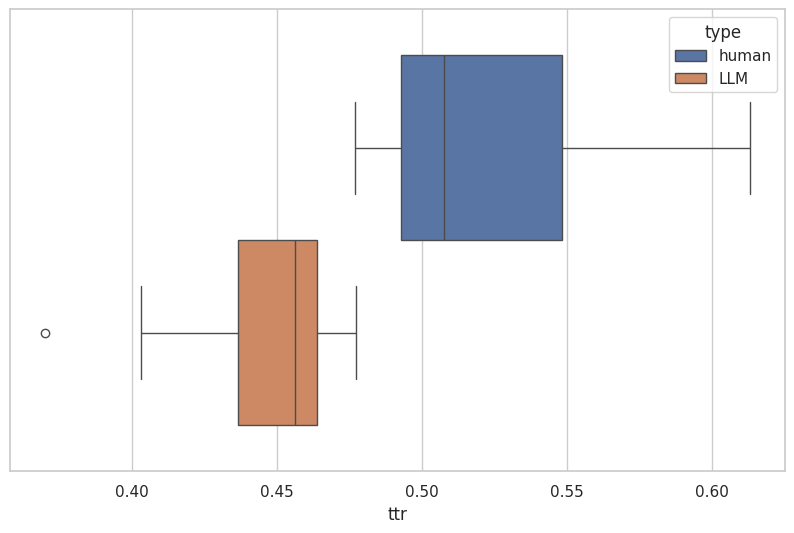

In [119]:
for feature in significant_ones["Feature"]: 
    plt.figure(figsize=(10, 6))  # Set figure size
    ax = sns.boxplot(data=df, hue="type", x=feature)
    plt.show()

In [120]:
df.groupby("type").count()

,MLC,MLS,DCC,CPC,profundidade_media,profundidade_max,ttr,text
type,,,,,,,,
LLM,20,20,20,20,20,20,20,20
human,11,11,11,11,11,11,11,11
